# Title:
"Predictiong Car Prices: A Machine Learning Approach

# Introduction
Predicting car prices is a common problem in machine learning and data science. The goal is to develop a model that can accurately estimate the price of a car based on various features such as make, model, year, mileage, fuel efficiency, and other relevant attributes. This task typically involves analyzing a dataset containing historical information about different cars, including their prices and associated features. Machine learning algorithms, such as regression models, are commonly employed to learn the patterns and relationships within the data, enabling the prediction of car prices for new or unseen instances. The accuracy of the model is crucial for informed decision-making in the automotive industry, including pricing strategies, market analysis, and customer behavior prediction.

# Dataset Description:
The data has been collected from the auto.am website and includes information about cars. Each car is described by 8 attributes:
1. Year of manufacture 
2. Type of engine 
3. Mileage 
4. Fuel type 
5. Color 
6. Body type 
7. Condition 
8. Engine volume 
### The dataset includes cars of five types:
1. Toyota Camry
2. Mercedes-Benz C class
3. Hyundai Elantra
4. Nissan Rogue
5. Kia Fort
### Files:
- train.csv: Training data for model learning.
- test.csv: Data for which prices need to be predicted.
- sample_submission.csv: A sample file for the submission of predictions.


#####   NOTE: The Data is in the Armenian language

# import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")


# Casses use in code and Fanctions
class ReplaceLanguage:

    def __init__(self, df, col, dec):
        self.df = df
        self.col = col
        self.dec = dec

    def replace_language(self):
        self.df[self.col] = self.df[self.col].replace(self.dec)
        return self.df[self.col]
    
# =======================><===========================================
def FeaturesEng(df):
    # Extract numeric part and unit into separate columns
    df[["numeric_distance", "unit"]] = df["running"].str.extract(r'(\d+)\s*(\w+)')

    # Convert numeric_distance to float
    df['numeric_distance'] = pd.to_numeric(df['numeric_distance'], errors='coerce')

    # Create a new column 'type' based on the unit
    df['type'] = df['unit'].apply(lambda x: 'Km' if x == 'Km' else 'Miles')

    # Convert the distance to kilometers based on the unit
    df['running'] = df.apply(lambda row: row['numeric_distance'] * 1.60934 if row['type'] == 'Miles' else row['numeric_distance'], axis=1)

    # Drop unnecessary columns
    df = df.drop(['numeric_distance', 'unit'], axis=1)

    # Convert 'type' column in TrainData


    df['type'] = df['type'].apply(lambda x: 1000 if 'Km' in x else (1.60934 if 'Miles' in x else x))
    # Display the updated DataFrame
    return df


# ====================================>LabelEncoder<==================================================================


def label_encoder(df, column_to_encode):
    le = LabelEncoder()
    df[column_to_encode + '_encoded'] = le.fit_transform(df[column_to_encode])
    df = df.drop(columns=[column_to_encode])
    return df

# Data Exploration and Preprocessing:


In [2]:
# Read training and test data,sample_submission.csv
TrainData = pd.read_csv("/kaggle/input/autoam-car-price-prediction/train.csv")
TestData = pd.read_csv("/kaggle/input/autoam-car-price-prediction/test.csv")
sample_submission = pd.read_csv("/kaggle/input/autoam-car-price-prediction/sample_submission.csv")

# Display basic information about the dataset
print("Samples")
TrainData.head()

Samples


,year,motor,running,wheel,color,car_type,status,motor_volume,price
0,2022,Բենզին,3000 կմ,Ձախ,Երկնագույն,Սեդան,Գերազանց,2.0,24500
1,2014,Բենզին,132000 կմ,Ձախ,Սև,Սեդան,Գերազանց,2.0,25500
2,2018,Բենզին,95000 մղոն,Ձախ,Այլ գույն,Սեդան,Գերազանց,2.0,11700
3,2002,Բենզին,137000 մղոն,Ձախ,Ոսկեգույն,Սեդան,Գերազանց,3.2,12000
4,2017,Բենզին,130000 կմ,Ձախ,Սև,Սեդան,Լավ,2.0,26000


In [3]:
TestData.head()

,Id,year,motor,running,wheel,color,car_type,status,motor_volume
0,0,2020,Բենզին,24000 կմ,Ձախ,Սև,Սեդան,Գերազանց,2.0
1,1,2017,Բենզին,85000 մղոն,Ձախ,Սպիտակ,Ամենագնաց,Գերազանց,2.0
2,2,2021,Բենզին,30000 մղոն,Ձախ,Սպիտակ,Սեդան,Գերազանց,2.0
3,3,2018,Բենզին,53000 մղոն,Ձախ,Արծաթագույն,Սեդան,Գերազանց,2.0
4,4,2003,Բենզին,230000 կմ,Ձախ,Սև,Ունիվերսալ,Նորմալ,1.8


In [4]:
TestData = TestData.drop(columns=['Id'])

In [5]:
print(f"Dimensions of training data: {TrainData.shape}")

print(f"Dimensions of Test data: {TestData.shape}")

Dimensions of training data: (1642, 9)
Dimensions of Test data: (411, 8)


In [6]:
print("Describe for numerical data")
TrainData.describe()

Describe for numerical data


,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [7]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1642 non-null   int64  
 1   motor         1642 non-null   object 
 2   running       1642 non-null   object 
 3   wheel         1642 non-null   object 
 4   color         1642 non-null   object 
 5   car_type      1642 non-null   object 
 6   status        1642 non-null   object 
 7   motor_volume  1642 non-null   float64
 8   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 115.6+ KB


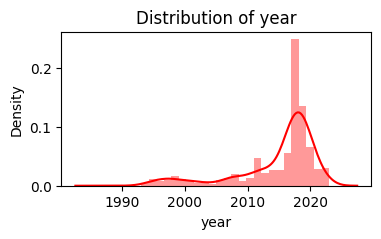

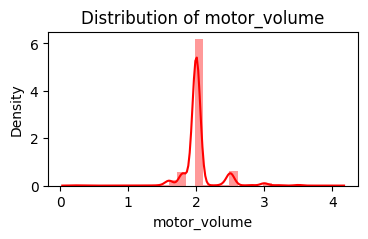

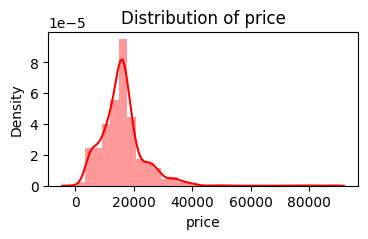

In [8]:
# Select numerical columns only
numerical_columns = TrainData.select_dtypes(include=['float64', 'int64'])

# Plot the distribution of each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(4, 2))
    sns.distplot(TrainData[column].dropna(), kde=True, bins=30, color='red')
    plt.title(f'Distribution of {column}')
    plt.show()


* Here we have created a set of dictionaries containing names in both Armenian and English to convert them to English.

In [9]:
Motor = {'Բենզին':'Gasoline', 'Գազ': 'Gas', 'Բենզին և գազ':'Gasoline and Gas', 'Դիզել': 'Diesel', 'Հիբրիդ':"Hybrid"}
Color = {"Երկնագույն": "Sky Blue","Սև": "Black","Այլ գույն": "Other Color","Ոսկեգույն": "Golden","Կապույտ": "Blue","Մոխրագույն": "Grey","Արծաթագույն": "Silver","Սպիտակ": "White","Սմբկագույն": "Clove","Նարնջագույն": "Orange","Կարմիր": "Red","Կանաչ": "Green","Բալագույն": "Beige","Շագանակագույն": "Brown","Բեժ": "Beige","Մանուշակագույն": "Purple","Վարդագույն": "Pink"}
car_type_mapping = {'Սեդան': 'Sedan', 'Ամենագնաց': 'SUV', 'Ունիվերսալ': 'Universal', 'Կուպե': 'Coupe', 'Պիկապ': 'Pickup', 'Հետչբեք': 'Hatchback', 'Մինիվեն / Միկրոավտոբուս': 'Minivan / Microbus'}
status_mapping = {"Գերազանց": "Excellent","Լավ": "Good","Վթարված": "Crashed","Նորմալ": "Normal","Նոր": "New"}

In [10]:
# Replacement of nouns from Armenian to English (For small counter)
# Train Data
TrainData['running'] = TrainData['running'].apply(lambda x: x.replace("կմ", "Km").replace("մղոն", "Miles"))
TrainData['wheel'] = TrainData['wheel'].apply(lambda x: x.replace("Ձախ", "Left"))

# Test Data
TestData['running'] = TestData['running'].apply(lambda x: x.replace("կմ", "Km").replace("մղոն", "Miles"))
TestData['wheel'] = TestData['wheel'].apply(lambda x: x.replace("Ձախ", "Left"))


In [11]:
# Replacement of nouns from Armenian to English (For Large counter)
# Iterate over datasets
for dataset in (TrainData, TestData):
    # Iterate over columns
    for column in ("motor", "color", "car_type", "status"):
        # Select the corresponding dictionary for the column
        replacement_dict = {
            "motor": Motor,
            "color": Color,
            "car_type": car_type_mapping,
            "status": status_mapping
        }[column]

        # Create an instance of ReplaceLanguage
        replacer = ReplaceLanguage(dataset, column, replacement_dict)

        # Call the replace_language method
        dataset[column] = replacer.replace_language()

# Print or use the modified datasets (TarinData)
TrainData.head()

,year,motor,running,wheel,color,car_type,status,motor_volume,price
0,2022,Gasoline,3000 Km,Left,Sky Blue,Sedan,Excellent,2.0,24500
1,2014,Gasoline,132000 Km,Left,Black,Sedan,Excellent,2.0,25500
2,2018,Gasoline,95000 Miles,Left,Other Color,Sedan,Excellent,2.0,11700
3,2002,Gasoline,137000 Miles,Left,Golden,Sedan,Excellent,3.2,12000
4,2017,Gasoline,130000 Km,Left,Black,Sedan,Good,2.0,26000


In [12]:
TrainData.head()

,year,motor,running,wheel,color,car_type,status,motor_volume,price
0,2022,Gasoline,3000 Km,Left,Sky Blue,Sedan,Excellent,2.0,24500
1,2014,Gasoline,132000 Km,Left,Black,Sedan,Excellent,2.0,25500
2,2018,Gasoline,95000 Miles,Left,Other Color,Sedan,Excellent,2.0,11700
3,2002,Gasoline,137000 Miles,Left,Golden,Sedan,Excellent,3.2,12000
4,2017,Gasoline,130000 Km,Left,Black,Sedan,Good,2.0,26000


# Visualizing statistical relationships

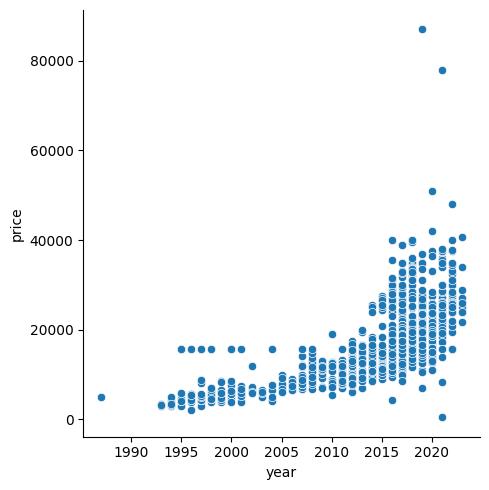

In [13]:
sns.relplot(data=TrainData, x="year", y="price")

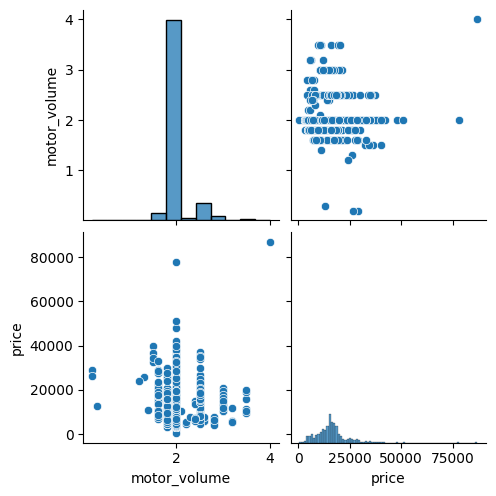

In [14]:
sns.pairplot(TrainData[['motor_volume', 'price']])
plt.show()

### Features Engineering  
Create a new "Running" column in your DataFrame that represents the distance traveled by the car, with all values standardized to kilometers. You also want to create a new column "Type" that indicates whether the original distance is in kilometers or miles.

In [15]:
# Apply the FeaturesEng function to the  DataFrame
TrainData = FeaturesEng(TrainData)

TestData = FeaturesEng(TestData)

In [16]:
TrainData.head()

,year,motor,running,wheel,color,car_type,status,motor_volume,price,type
0,2022,Gasoline,3000.00,Left,Sky Blue,Sedan,Excellent,2.0,24500,1000.00000
1,2014,Gasoline,132000.00,Left,Black,Sedan,Excellent,2.0,25500,1000.00000
2,2018,Gasoline,152887.30,Left,Other Color,Sedan,Excellent,2.0,11700,1.60934
3,2002,Gasoline,220479.58,Left,Golden,Sedan,Excellent,3.2,12000,1.60934
4,2017,Gasoline,130000.00,Left,Black,Sedan,Good,2.0,26000,1000.00000


In [17]:
# scaling numerical data in a dataset
scaler = MinMaxScaler()

numerical_columns_new_Train = TrainData.select_dtypes(include=['float64', 'int64']).columns
TrainData[numerical_columns_new_Train] = scaler.fit_transform(TrainData[numerical_columns_new_Train])


numerical_columns_new_Test = TestData.select_dtypes(include=['float64', 'int64']).columns
TestData[numerical_columns_new_Test] = scaler.fit_transform(TestData[numerical_columns_new_Test])

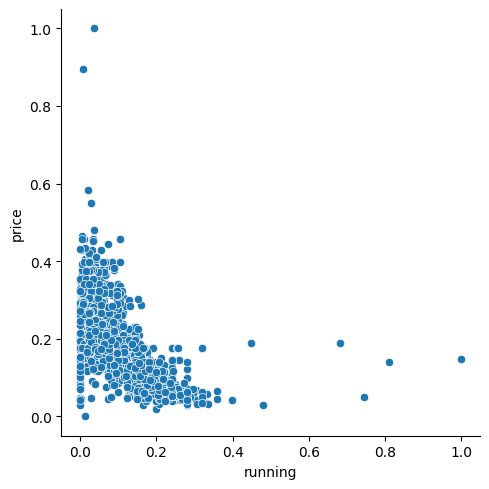

In [18]:
sns.relplot(data=TrainData, x="running", y="price")

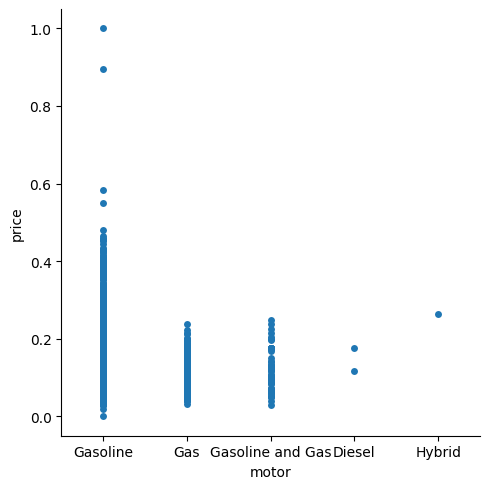

In [19]:
sns.catplot(data=TrainData, x="motor", y="price", jitter=False)


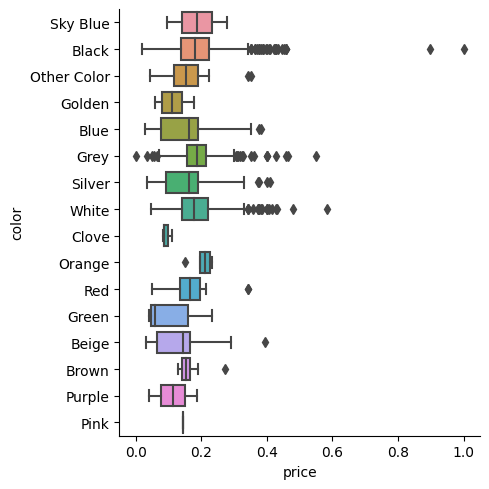

In [20]:
sns.catplot(data=TrainData, x="price", y="color", kind="box")

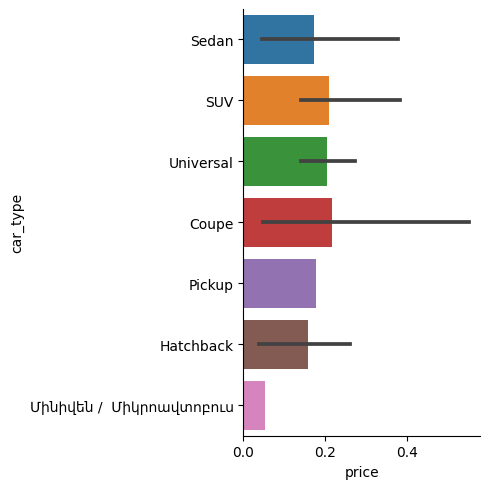

In [21]:
sns.catplot(data=TrainData, x="price", y="car_type", errorbar=("pi", 95), kind="bar")

<Axes: xlabel='price', ylabel='status'>

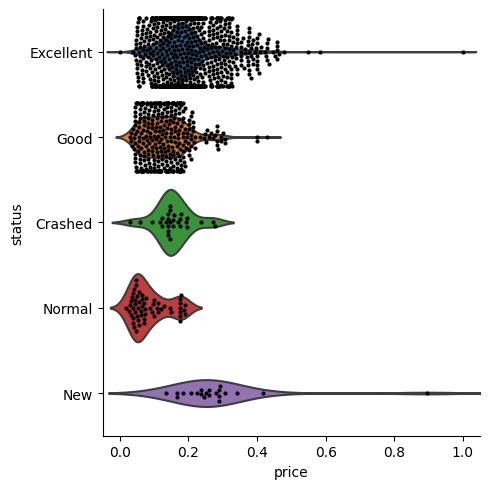

In [22]:
# status

g = sns.catplot(data=TrainData, x="price", y="status", kind="violin", inner=None)
sns.swarmplot(data=TrainData, x="price", y="status", color="k", size=3, ax=g.ax)

In [23]:
for column in ("wheel","motor", "color", "car_type", "status"):
    TrainData = label_encoder(TrainData, column)
    TestData = label_encoder(TestData, column)

In [24]:
TrainData = pd.DataFrame(TrainData)

TrainData.columns

Index(['year', 'running', 'motor_volume', 'price', 'type', 'wheel_encoded',
       'motor_encoded', 'color_encoded', 'car_type_encoded', 'status_encoded'],
      dtype='object')

In [25]:
TestData = pd.DataFrame(TestData)

TestData.head()

,year,running,motor_volume,type,wheel_encoded,motor_encoded,color_encoded,car_type_encoded,status_encoded
0,0.900000,0.040238,0.178571,1.0,0,1,1,3,1
1,0.800000,0.229675,0.178571,0.0,0,1,12,2,1
2,0.933333,0.081016,0.178571,0.0,0,1,12,3,1
3,0.833333,0.143183,0.178571,0.0,0,1,10,3,1
4,0.333333,0.386215,0.107143,1.0,0,1,1,4,4


In [26]:
#  Spliting data to x_train and y_train
# X Tarining
X_data = TrainData.drop(columns=['price'])
# Y Training
Y_data = TrainData.price


(X_train, X_val, y_train, y_val) = train_test_split(X_data, Y_data, test_size=0.1, random_state=42)


# Model Selection:
Linear regression is a straightforward and easy-to-understand model. It provides a clear interpretation of the relationship between the input features and the target variable. Each feature has a corresponding coefficient that represents its impact on the target variable.

In [27]:
mode = LinearRegression()

# Model Training:

In [28]:
mode.fit(X_train,y_train)

LinearRegression()

In [29]:
mode.coef_

array([ 2.84307437e-01, -1.33894061e-01,  8.65099946e-02,  3.38731641e-02,
        1.52655666e-16,  3.29029813e-03, -3.44554540e-04, -1.69884270e-03,
       -3.74695929e-06])

In [30]:
# Make predictions
y_pred = mode.predict(X_val)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


mbe = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mbe}')


Mean Squared Error: 0.003107405841841689
Mean Absolute Error: 0.037807511530647445


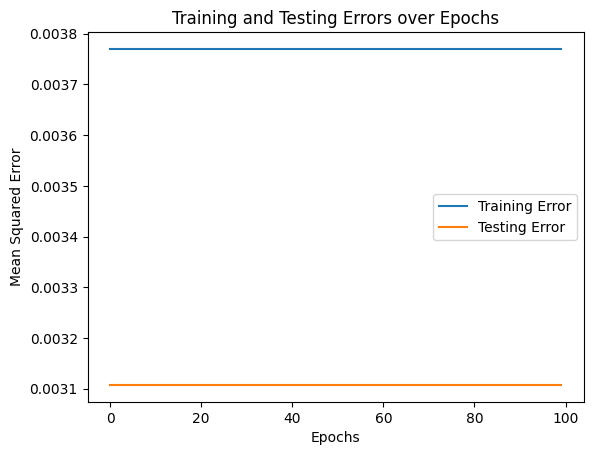

In [31]:
# Lists to store training and testing errors
train_errors = []
test_errors = []

# Training loop
for epoch in range(100):
    mode.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = mode.predict(X_train)
    y_test_pred = mode.predict(X_val)
    
    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_val, y_test_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(train_errors, label='Training Error')
plt.plot(test_errors, label='Testing Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Testing Errors over Epochs')
plt.show()